Diabetes is a condition in which the amount of glucose (sugar) in your blood is too high because your body cannot use it properly. This happens because your body either cannot use or make a hormone called insulin, which is responsible for turning sugar into food for your body's cells.
There are two main types of diabetes:
Type 1, where your body is unable to produce any insulin 
Type 2, where your body either does not produce enough insulin, or cannot use it.

We have 768 patients in the dataset and 9 columns. Lets discuss each column one by one.

Pregnancies is the number of times a person was pregnant. It's important to know the number of times a woman has become pregnant because each pregnancy has the risk of developing gestional diabetes (GDM) which itself is a risk factor for diabetes (DM).

Glucose is the measure of plasma (or blood) glucose 2 hours after a oral glucose test. The elevated levels of glucose after 2 hours indicates impaired insulin function which can be a diagnostic for diabetes.

Blood pressure itself can't be used to determine if one has diabetes or not, but high blood pressure usually coexists with diabetes.

SkinThickness is how thick the tricep skin fold is. This test is a surrogate measure for body fat composition. Diabetics usually have high body fat.

Insulin is the insulin level, 2 hours after ingesting oral glucose.

BMI is body mass index. This column informs us if the patient is overweight for their height. Being overweight is a risk factor for diabetes.

Age is self-explanatory. Diabetes is more common in the elderly due to various reasons.

Outcome is the target variable. It tells us if someone has diabetes or not.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('diabetes.csv')

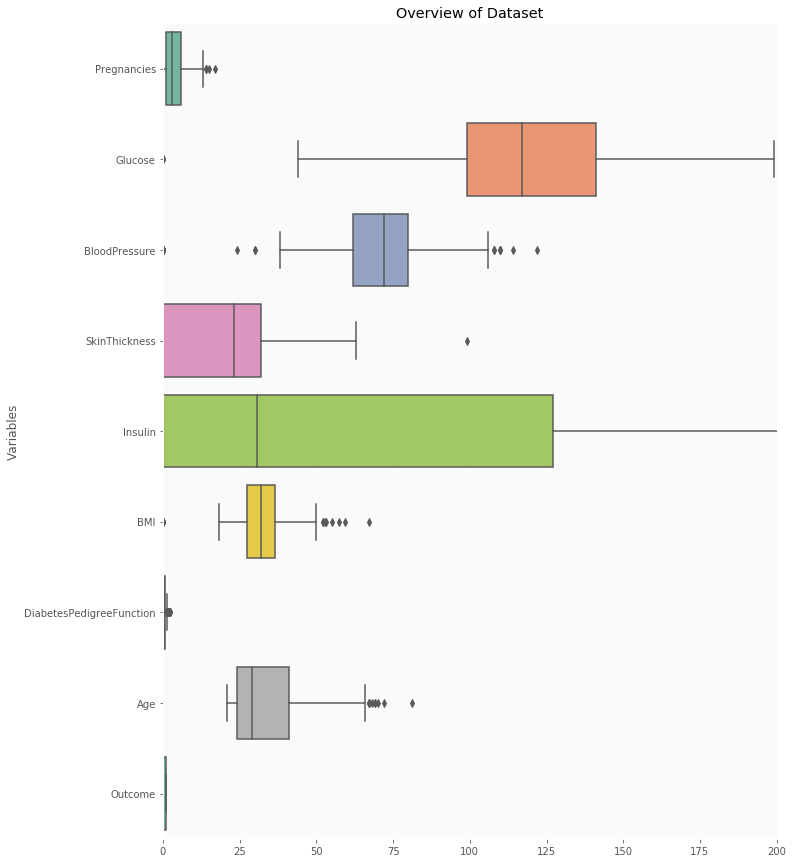

In [19]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview of Dataset")
ax = sns.boxplot(data = data, orient = 'h',palette = 'Set2')

In [67]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.dtypes()

TypeError: 'Series' object is not callable

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#No missing values....... but we have to replace Blood Pressure=0 to NAN.
# Not changing Pregnancies and Outcome variable because 0 is a valid answer for both of them

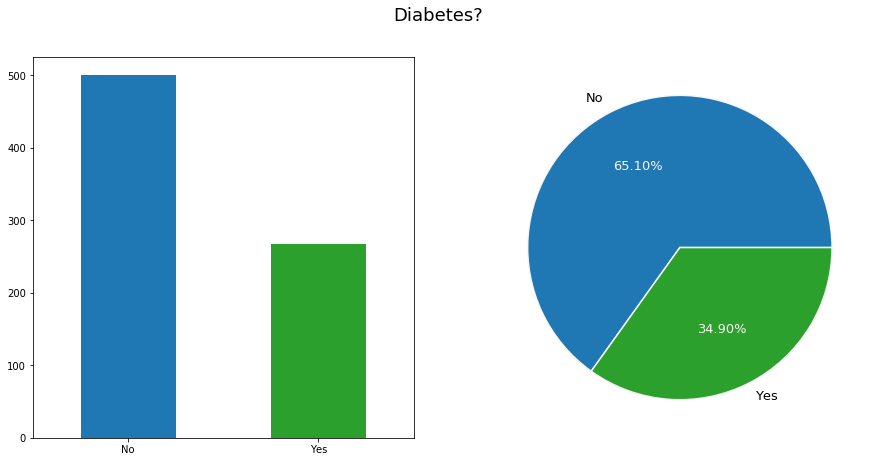

In [73]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

Below is an examination of correlation among the independent variables, and between the dependent and the independent variables. The Correlation Coefficient value can range from -1 to 1. If the correlation between two variables is -1, they are both highly negatively correlated, whereas if the correlation between two variables is +1, they both are highly positively correlated. A correlation coefficient of 0 indicated that there is no correlation between the two variables.

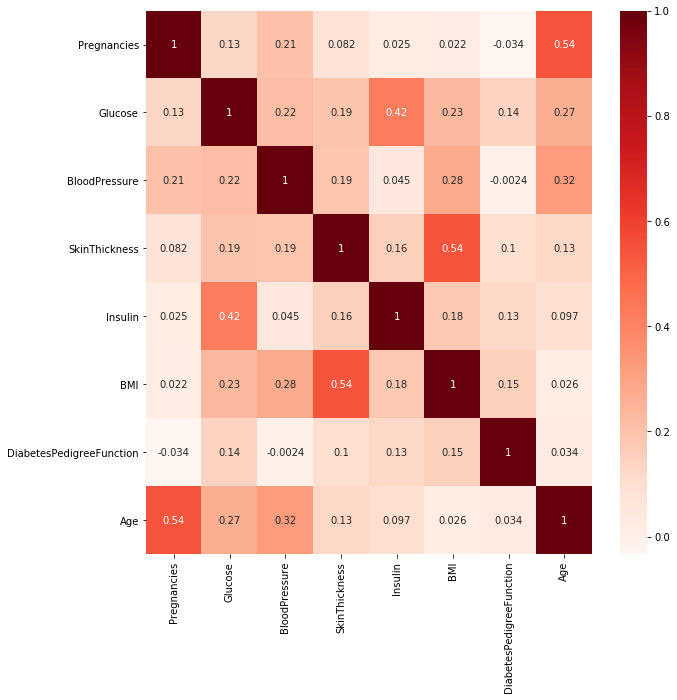

In [94]:
m=data.loc[:,data.columns!='Outcome'].corr()
plt.figure(figsize=(10,10))
sns.heatmap(m,annot=True,cmap="Reds")
#correlation between few columns.
#Age is highly correlated with Pregnancies.
#Insulin is highly correlated with skinthickness.
# Insulin surprisingly correlates more with SkinThickness than with Outcome.
#This could be due to the fact since high body fat is known to cause increased insulin resistance which leads to the pancreas to release more insulin.Increased SkinThickness leads to increased body fat.
#Also skinthickness is correlated with BMI.
#Glucose and Insulin, Pregnancies and Age, SkinThickness and BMI have relatively high values.
#DiabetesPedigreeFunction, in particular, appears to have little correlation with other variables.

Glucose has the highest correlation with Outcome and BloodPressure has the lowest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002022320D2E8>,
      dtype=object)

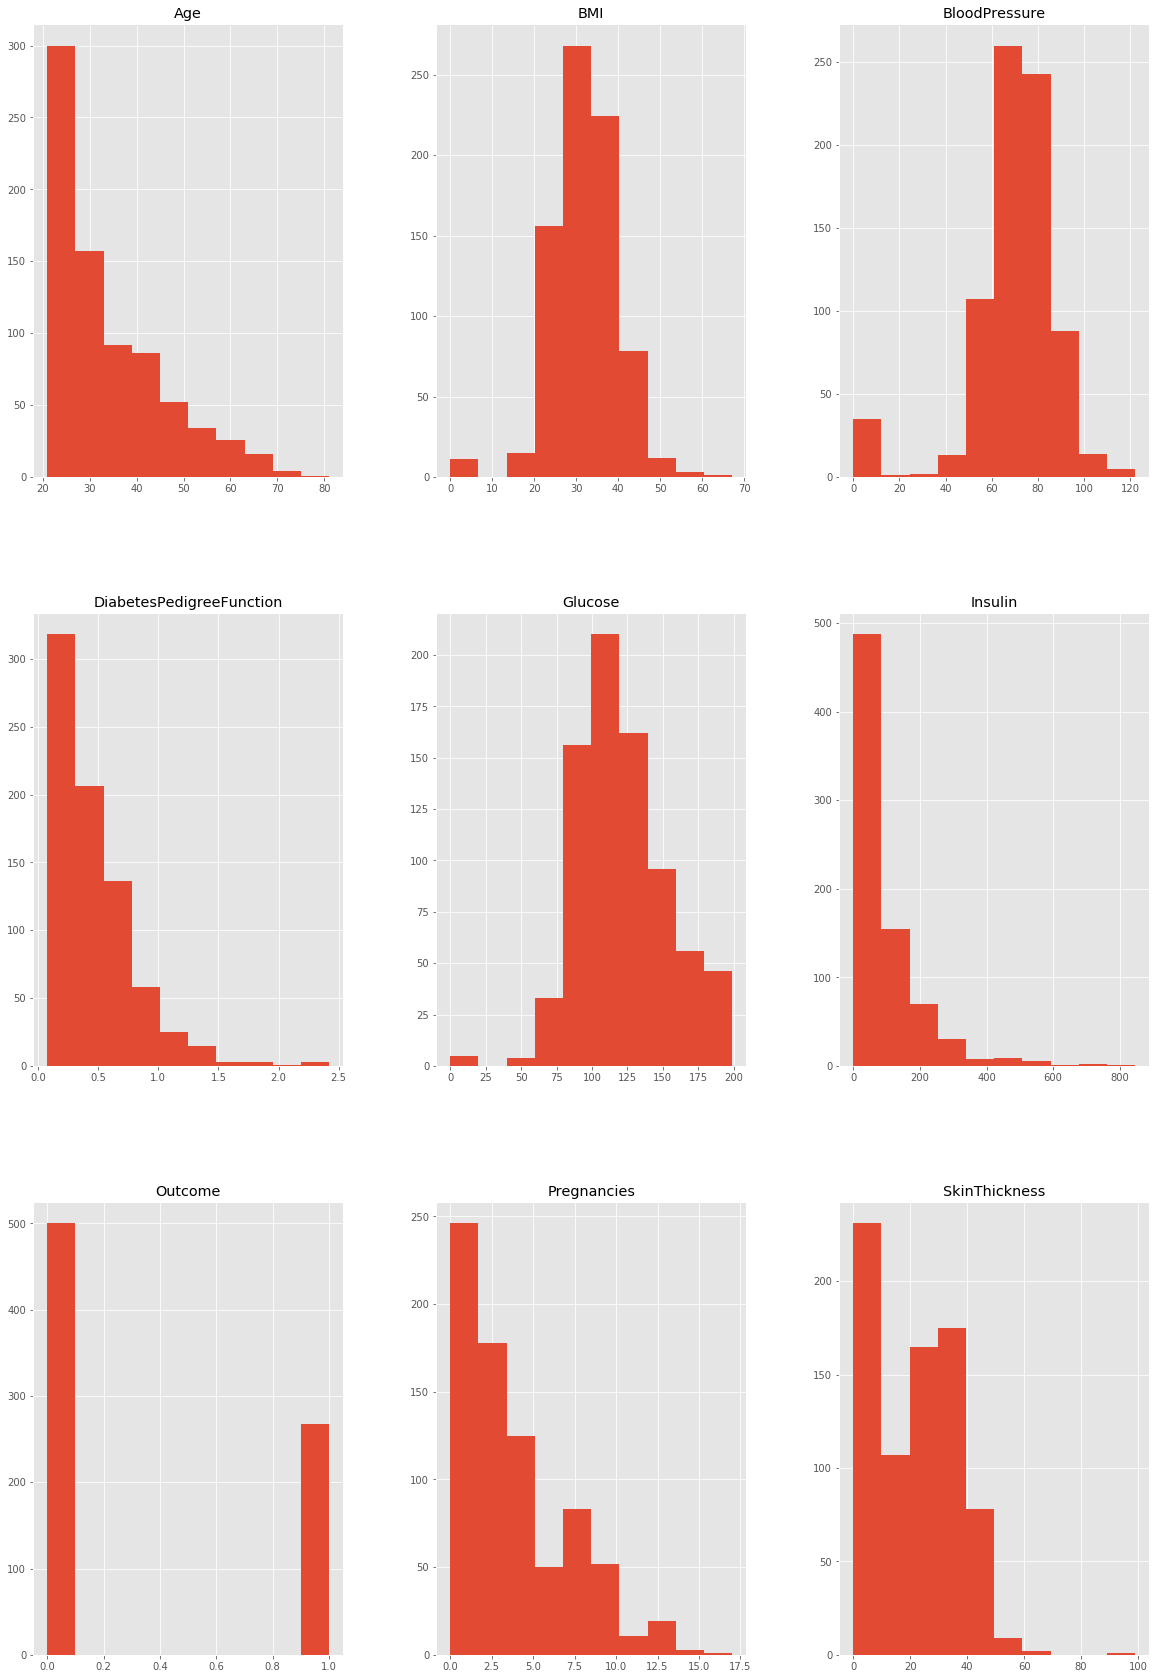

In [7]:
data.hist(figsize=(20,30))
#Attributes BMI, BloodPressure, Glucose are found to be normally distributed.
#Age, DiabetesPedigreeFunction, Insulin, Pregnancies found to be exponentially distributed

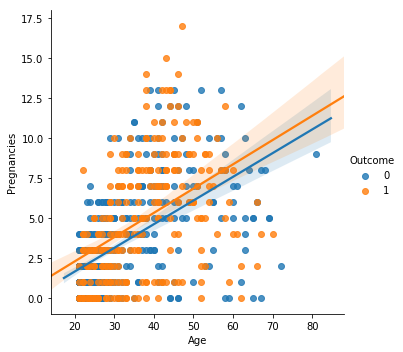

In [92]:
sns.lmplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
#age and preg.. related

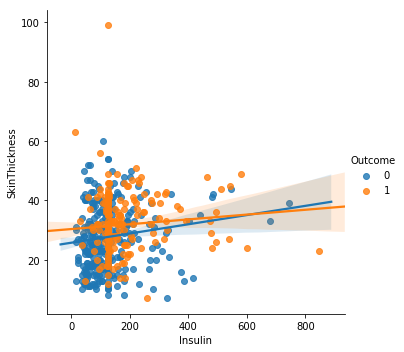

In [93]:
sns.lmplot(x='Insulin',y='SkinThickness',hue='Outcome',data=data)
#related

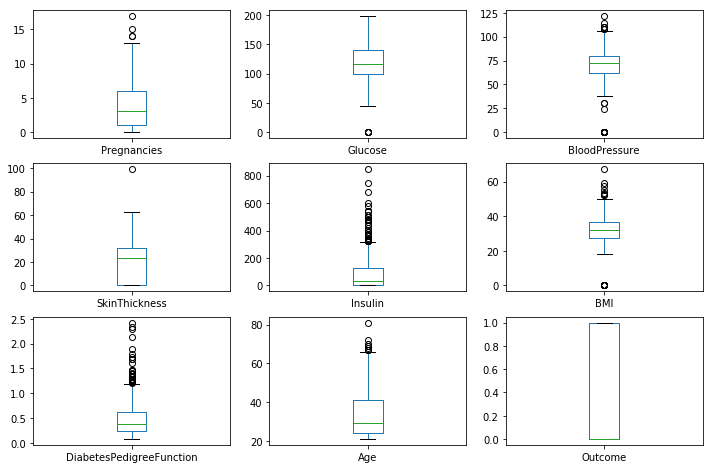

In [11]:
#Boxplot of each column
data.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))
plt.show()

In [116]:
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan) 
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan) 
data['Insulin'] = data['Insulin'].replace(0, np.nan)        
data['BMI'] = data['BMI'].replace(0, np.nan) 
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0, np.nan) 
data['Age'] = data['Age'].replace(0, np.nan) 

In [34]:
data.isnull().sum()
#now we have found out that there are many missing values...

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
level                         0
INSULIN_DESC                  0
dtype: int64

In [70]:
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


In [130]:
data['BMI'].fillna(data['BMI'].median(), inplace=True)
data['Glucose'].fillna(data['Glucose'].median(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
#filling missing values with median
#imputation is the process of replacing missing data with substituted values

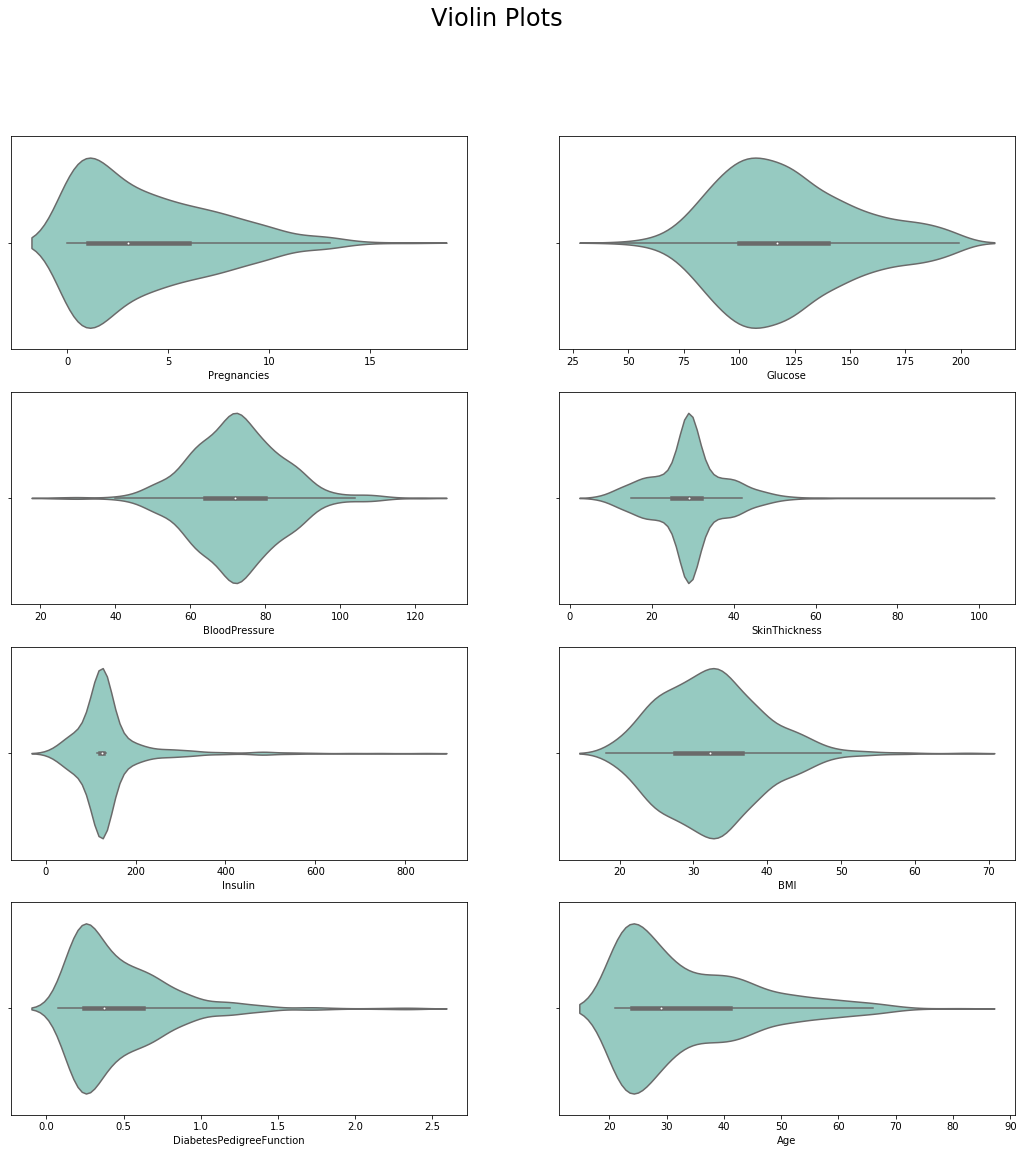

In [74]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="Pregnancies", data=data,ax=ax[0,0],palette='Set3')
sns.violinplot(x="Glucose", data=data,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='BloodPressure', data=data, ax=ax[1,0], palette='Set3')
sns.violinplot(x='SkinThickness', data=data, ax=ax[1,1],palette='Set3')
sns.violinplot(x='Insulin', data=data, ax=ax[2,0], palette='Set3')
sns.violinplot(x='BMI', data=data, ax=ax[2,1],palette='Set3')
sns.violinplot(x='DiabetesPedigreeFunction', data=data, ax=ax[3,0],palette='Set3')
sns.violinplot(x='Age', data=data, ax=ax[3,1],palette='Set3')
plt.show()

In [10]:
bin_data2= data.groupby("Age")[["Outcome"]].count()
bin_data2["% Diabetic"] = (bin_data2["Outcome"]/bin_data2["Outcome"])*100

In [11]:
bins = np.arange(min(data["Glucose"]),max(data["Glucose"]),10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

In [115]:
data["Glucose Level"] = pd.cut(data["Glucose"], bins=bins)
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose Levels,Glucose Level
0,6,148,72,35,0,33.6,0.627,50,1,"(140.0, 150.0]","(140.0, 150.0]"
1,1,85,66,29,0,26.6,0.351,31,0,"(80.0, 90.0]","(80.0, 90.0]"
2,8,183,64,0,0,23.3,0.672,32,1,"(180.0, 190.0]","(180.0, 190.0]"
3,1,89,66,23,94,28.1,0.167,21,0,"(80.0, 90.0]","(80.0, 90.0]"
4,0,137,40,35,168,43.1,2.288,33,1,"(130.0, 140.0]","(130.0, 140.0]"
5,5,116,74,0,0,25.6,0.201,30,0,"(110.0, 120.0]","(110.0, 120.0]"
6,3,78,50,32,88,31.0,0.248,26,1,"(70.0, 80.0]","(70.0, 80.0]"
7,10,115,0,0,0,35.3,0.134,29,0,"(110.0, 120.0]","(110.0, 120.0]"
8,2,197,70,45,543,30.5,0.158,53,1,NaN,NaN
9,8,125,96,0,0,0.0,0.232,54,1,"(120.0, 130.0]","(120.0, 130.0]"


In [117]:
bindata1 = data[data["Outcome"]==1].groupby("Glucose Level")[["Outcome"]].count()
bindata = data.groupby("Glucose Level")[["Outcome"]].count()
bindata1["% Diabetic"] = (bindata1["Outcome"]/bindata["Outcome"])*100

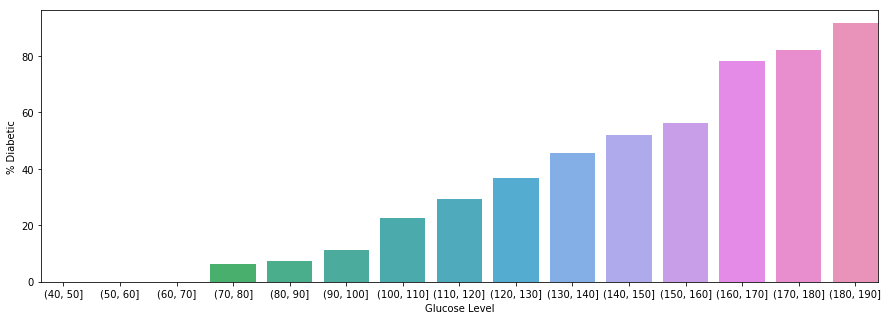

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x=bindata1.index, y=bindata1["% Diabetic"])
plt.autoscale(enable=True, axis='x', tight=True)
#Higher the Glucose Levels higher the chance of testing Diabetes.

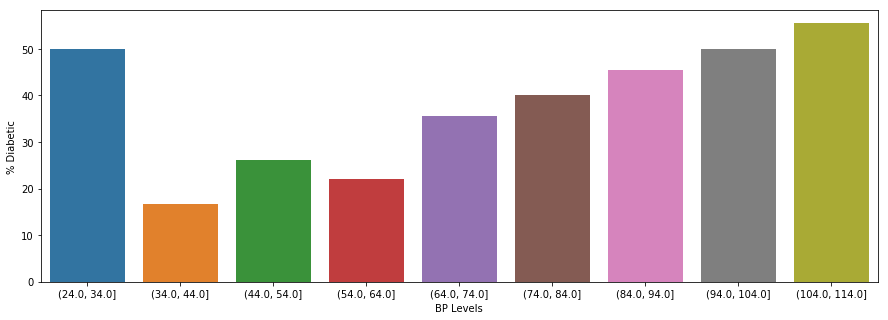

In [88]:
bins = np.arange(min(data["BloodPressure"]),max(data["BloodPressure"]),10)
data["BP Levels"] = pd.cut(data["BloodPressure"], bins=bins)
bindata1 = data[data["Outcome"]==1].groupby("BP Levels")[["Outcome"]].count()
bindata = data.groupby("BP Levels")[["Outcome"]].count()
bindata1["% Diabetic"] = (bindata1["Outcome"]/bindata["Outcome"])*100
plt.figure(figsize=(15,5))
sns.barplot(x=bindata1.index, y=bindata1["% Diabetic"])

**Can hypertension cause diabetes?**
A meta-analysis appearing in the Journal of the American College of Cardiology (JACC) in 2015 looked at data for more than 4 million adults. It concluded that people with high blood pressure have a higher risk of developing type 2 diabetes.

Having diabetes raises your risk of heart disease, stroke, kidney disease and other health problems. Having high blood pressure also raises this risk. If you have diabetes and high blood pressure together, this raises your risk of health problems even more.
If you have diabetes, your doctor will want to be sure that your blood pressure is very well controlled. This means that they will probably want your blood pressure to be below 130 over 80.

Hypertension and diabetes often occur together, and they appear to share some risk factors and causes.
Lifestyle adjustments can help control blood pressure and blood sugar levels, but most people will need to follow a treatment plan for life.

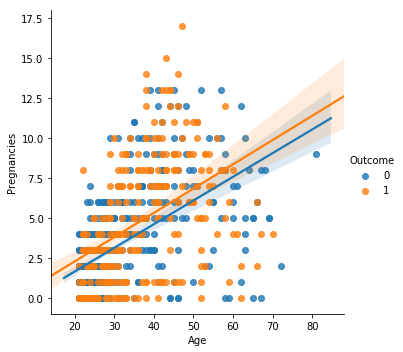

In [91]:
sns.lmplot(x='Age',y='Pregnancies',hue='Outcome',data=data)

What is the distribution of number of pregnancies?What is the effect of number of pregnancies on the outcome?

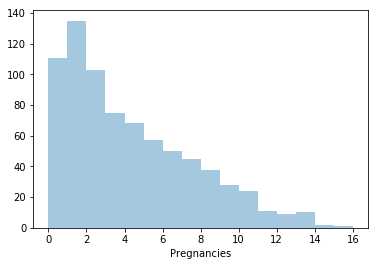

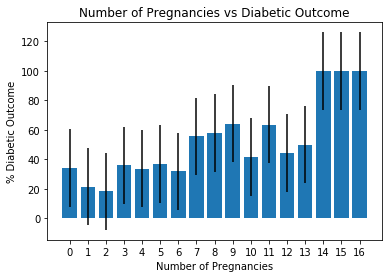

In [95]:
sns.distplot(data['Pregnancies'], kde=False, bins=range(0,17),)
plt.show()

pregnancies_group = data.groupby(['Pregnancies'], as_index=False)
pregnancies_group_count = pregnancies_group.count()['Outcome']
pregnancies_group_sum = pregnancies_group.sum()['Outcome']
pregnancies_group_percentage = pregnancies_group_sum / pregnancies_group_count * 100

plt.bar(x=range(0,17), height=pregnancies_group_percentage, yerr=pregnancies_group_percentage.std(), tick_label=range(0,17))
plt.title("Number of Pregnancies vs Diabetic Outcome")
plt.xlabel("Number of Pregnancies")
plt.ylabel("% Diabetic Outcome")
plt.show()
#right skewed

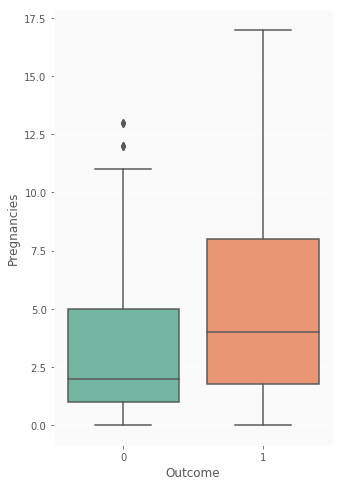

In [13]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(5,8))
ax.set_facecolor('#fafafa')
ax.set(xlim=(0,1))
ax = sns.boxplot(x='Outcome',y='Pregnancies',data = data,palette = 'Set2')


We can see that most females have 0-2 babies.
We can also so see that having high number of pregnancy increases the risk of diabetes significantly.

effect of BMI on the Outcome

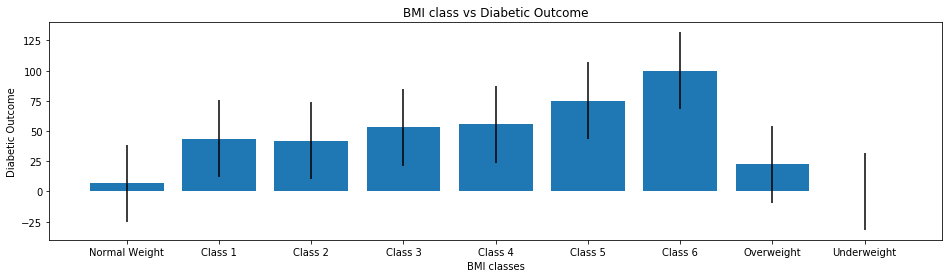

In [103]:
def get_bmi_groups(bmi):
    if bmi >= 16 and bmi <18.5:
        return "Underweight"
    elif bmi >= 18.5 and bmi < 25 :
        return "Normal weight"
    elif bmi >= 25 and bmi < 30:
        return "Overweight"
    elif bmi >= 30 and bmi < 35:
        return "Obese Class I (Moderately obese)"
    elif bmi >= 35 and bmi < 40:
        return "Obese Class II (Severely obese)"
    elif bmi >= 40 and bmi < 45:
        return "Obese Class III (Very severely obese)"
    elif bmi >= 45 and bmi < 50:
        return "Obese Class IV (Morbidly Obese)"
    elif bmi >= 50 and bmi < 60:
        return "Obese Class V (Super Obese)"
    elif bmi >= 60:
        return "Obese Class VI (Hyper Obese)"


data['bmi_groups'] = data['BMI'].apply(get_bmi_groups)

bmi_groups_groupby = data.groupby(['bmi_groups'])
bmi_groups_groupby_count = bmi_groups_groupby.count()['Outcome']
bmi_groups_groupby_sum = bmi_groups_groupby.sum()['Outcome']
bmi_groups_groupby_percentage = bmi_groups_groupby_sum / bmi_groups_groupby_count * 100
plt.figure(figsize=(16,4))
plt.bar(x=range(0,9), height=bmi_groups_groupby_percentage, yerr=bmi_groups_groupby_percentage.std(), tick_label=["Normal Weight", "Class 1", "Class 2","Class 3", "Class 4", "Class 5", "Class 6", "Overweight", "Underweight"])
plt.title("BMI class vs Diabetic Outcome")
plt.xlabel("BMI classes")
plt.ylabel("Diabetic Outcome")
plt.show()


more overweight a person is, the more likely they are diabetic

In [141]:
data['level'] = data['Glucose'].apply(lambda value: 'normal' 
                                                          if value <= 100 else 'prediabetic' 
                                                              if value <= 126 else 'high diabetic')

In [151]:
num1=data[data['level']=='prediabetic'].count()

In [152]:
p2=num1/768
p2

Pregnancies                 0.352865
Glucose                     0.352865
BloodPressure               0.352865
SkinThickness               0.352865
Insulin                     0.352865
BMI                         0.352865
DiabetesPedigreeFunction    0.352865
Age                         0.352865
Outcome                     0.352865
Glucose Levels              0.346354
Glucose Level               0.346354
INSULIN_LEVEL               0.352865
level                       0.352865
dtype: float64

In [145]:
num2=data[data['level']=='normal'].count()

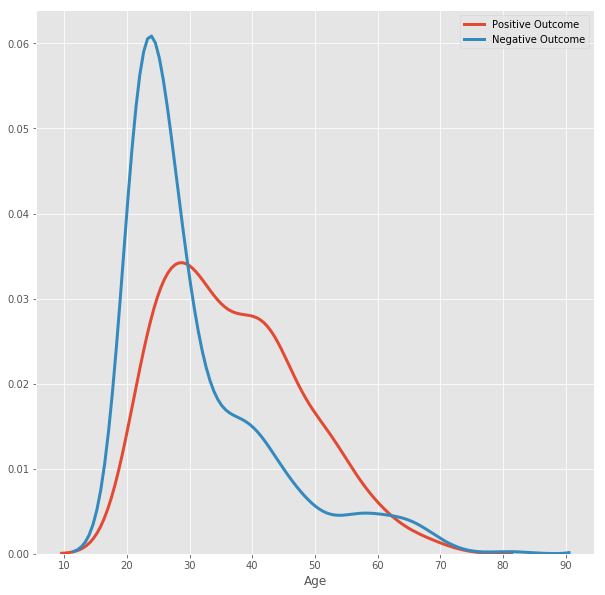

In [28]:
positive = data[data['Outcome']==1]
negative = data[data['Outcome']==0]
plt.subplots(figsize = (10,10))
sns.distplot(positive['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Positive Outcome')
sns.distplot(negative['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'Negative Outcome')
plt.show()
#As we can see in most of the cases Diabetes starts to affect predominantly in middle age, around 30.

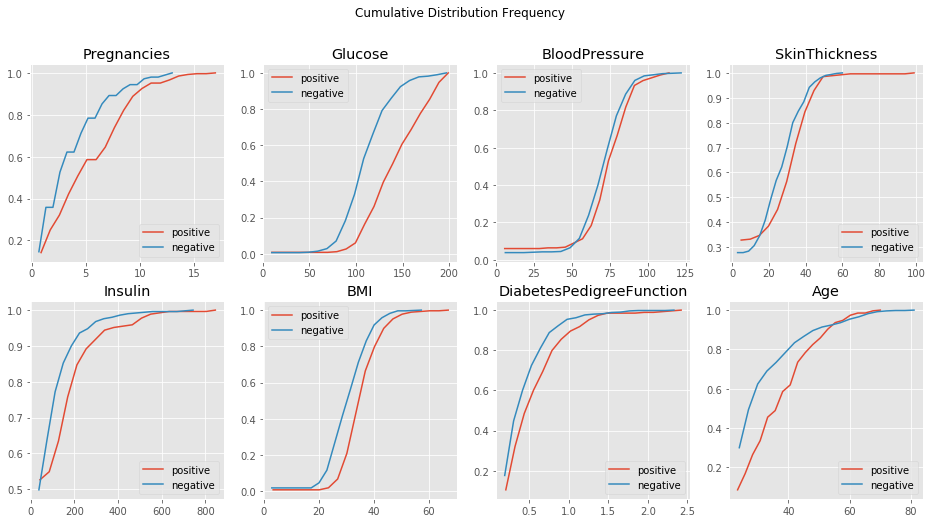

In [30]:
f,axes = plt.subplots(2,4,figsize=(16,8))
count=0
for i in range(2):
    for j in range(4):
        axes[i][j].set_title(data.columns[count])
        counts,bins = np.histogram(positive.iloc[:,count],bins=20)
        cdf = np.cumsum(counts)
        sns.lineplot(bins[1:],cdf/cdf[-1],ax = axes[i][j],label = 'positive')
        counts,bins = np.histogram(negative.iloc[:,count],bins=20)
        cdf = np.cumsum(counts)
        sns.lineplot(bins[1:],cdf/cdf[-1],ax = axes[i][j],label='negative')
        count=count+1
plt.suptitle('Cumulative Distribution Frequency ')
plt.show()


C:\Users\SAUMYA ACHANTANI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SAUMYA ACHANTANI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


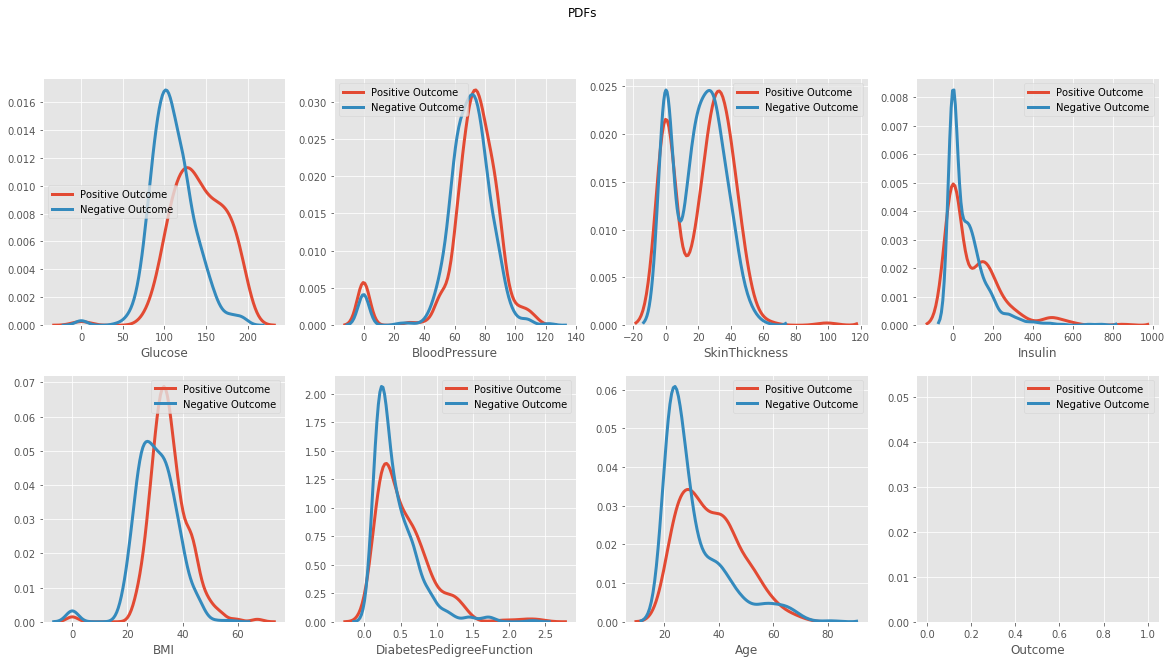

In [47]:
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=0

for i in range(2):
    for j in range(4):
        count=count+1
        sns.distplot(positive.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Positive Outcome',ax = axes[i][j])
        sns.distplot(negative.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Negative Outcome',ax = axes[i][j])
        axes[i][j].legend()
        
f.suptitle('PDFs')
plt.show()
      

In [119]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
data= data.assign(INSULIN_LEVEL=data.apply(set_insulin, axis=1))

In [46]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,level,INSULIN_LEVEL
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,high diabetic,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,normal,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,high diabetic,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,high diabetic,Abnormal


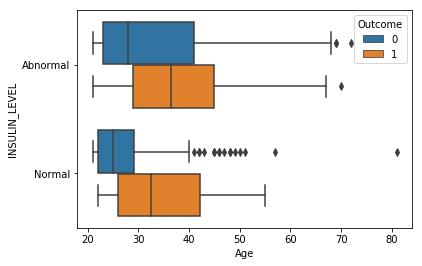

In [121]:
sns.boxplot(x="Age", y="INSULIN_LEVEL", hue="Outcome", data=data);
#It seems from the plot that patients having normal insulin levels are more diabetic within the age range from 25 and 42 where as patients having abnormal insulin levels are more diabetic in the age range of late 20's to mid 40's.

In [59]:
data['Age']=data['Age']
bins=[21,30,59,65]
labels=['Young Adult','Middle aged Adult','Old aged Adult']
data['age_grp']=pd.cut(data['Age'],bins,labels=labels)

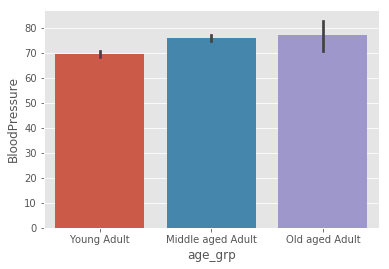

In [61]:
#age_grp - blood_pressure
result = data.groupby(["age_grp"])['BloodPressure'].aggregate(np.median).reset_index().sort_values('BloodPressure')
sns.barplot(x='age_grp', y="BloodPressure", data=data, order=result['age_grp']) 
#bp increases with age mostly bcoz of structural changes in arteries and stiffness associated with it

In [13]:
data.MakeCdf()

AttributeError: 'DataFrame' object has no attribute 'MakeCdf'

In [21]:
import thinkplot

In [22]:
import thinkstats2

In [34]:
pmf=thinkstats2.Pmf(data['Insulin'])

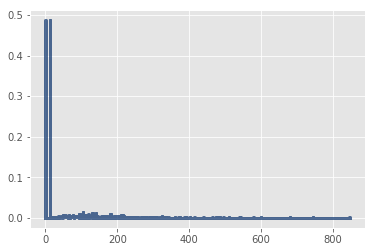

In [35]:
thinkplot.Pmf(pmf)

In [36]:

data[data['Insulin']>126].count()
p1=193/786
p1  #probability of success that the person sufers from high risk
bin1=np.random.binomial(n=786,p=p1,size=int(1e6)) #prob of success given
bin_cdf=thinkstats2.Cdf(bin1)
a=bin_cdf.Prob(200)
1-a # prob of more than 200 peoplehaving insulin greater than 126

0.265609

In [56]:
from scipy import stats

In [59]:
data['BloodPressure'].mean()

69.10546875

In [60]:
data['BloodPressure'].std()

19.355807170644777

In [ ]:
#diastolic blood pressure :-less than 80 normal,90 or higher is high,higher than 120 is critical

**Q.Find the probability of people having blood pressure 90 mm hg or higher??**

In [158]:
1-stats.norm.cdf(90,loc=69.105,scale=19.356)

0.14018016807112854

**Q.Find the probability of people having normal blood pressure??**

In [159]:
stats.norm.cdf(80,loc=69.105,scale=19.356)

0.7132398480343185

In [1]:
data['BMI'].mean()

NameError: name 'data' is not defined

In [ ]:
stats.norm.cdf()

In [138]:
cdf=thinkstats2.Cdf(data['Pregnancies'])

{'xscale': 'linear', 'yscale': 'linear'}

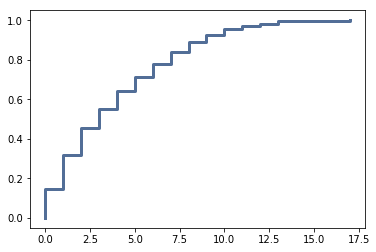

In [139]:
thinkplot.Cdf(cdf)

BMI ranges
If your BMI is: below 18.5 – you're in the underweight range. between 18.5 and 24.9 – you're in the healthy weight range. between 25 and 29.9 – you're in the overweight range.obesity:-30 and above

In [77]:
data['BMI'].mean()

31.992578124999977

In [78]:
data['BMI'].std()

7.8841603203754405

**What percentage of people are under normal range of BMI?**

In [89]:
(stats.norm.cdf(24.9,loc=31.99258,scale=7.88416)-stats.norm.cdf(18.5,loc=31.99258,scale=7.88416))*100

14.065893344461792

In [11]:
a=data[data['BMI']>30]
b=a[a['Age']>45]
c=b.count()
c[0]

65

**What is the probability of overweight people?**

In [92]:
(stats.norm.cdf(29.9,loc=31.99258,scale=7.88416)-stats.norm.cdf(25,loc=31.99258,scale=7.88416))*100

20.778228927518782

**obese?**

In [94]:
1-(stats.norm.cdf(30,loc=31.99258,scale=7.88416))

0.5997623642677403

In [5]:
data['BMI'].mode()

0    32.0
dtype: float64

In [6]:
data['DiabetesPedigreeFunction'].mean()

0.4718763020833327

Q.probability that diabetes_pedigree_function will be greater than 0.47 for the second person,and not first person

0.249362

In [ ]:
import scipy.stats as st
Mu = 72.4  
Std = 12.09
sample_avg_bp = np.average(data['BloodPressure'])
std_error_bp = Std / np.sqrt(pima_df.size) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

# Z_norm_deviate =  sample_mean - population_mean / std_error_bp

Z_norm_deviation = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviation)

p_value = st.norm.sf(abs(Z_norm_deviation))*2 #twosided using sf - Survival Function
print('p values' , p_value)

if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

In [12]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,14.052296,9.265111,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,14.052296,1026.101082,95.139571,28.771152,1222.028870,55.743013,1.445663,99.417544,7.140856
BloodPressure,9.265111,95.139571,375.205004,64.368827,196.505673,43.042418,0.268278,54.916757,0.615975
SkinThickness,-4.390041,28.771152,64.368827,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1222.028870,196.505673,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.743013,43.042418,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.445663,0.268278,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.417544,54.916757,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.140856,0.615975,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130190,0.141952,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.130190,1.000000,0.153332,0.056304,0.331031,0.220719,0.136211,0.263908,0.467392
BloodPressure,0.141952,0.153332,1.000000,0.208315,0.088028,0.281843,0.041802,0.241076,0.066674
SkinThickness,-0.081672,0.056304,0.208315,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331031,0.088028,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.220719,0.281843,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.136211,0.041802,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263908,0.241076,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.467392,0.066674,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
s2 = data[data['Outcome']==0]
u1=s2['Glucose'].mean()
u1

109.904

In [16]:
mu=100
t_critical = 2.093
x_bar =u1
std1=s2['Glucose'].std()
N = len(s2)
SE = std1/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)
t, p = stats.ttest_1samp(s2['Glucose'], mu)
print("t = ", t, ", p = ", p)
#t is greater in magnitude that t critical* so there is a statistically significant difference at the α = 0.05 level between the sample mean and the stated population mean . 

t-statistic:  8.450386389828676
t =  8.450386389828674 , p =  3.203389438879747e-16


In [17]:
err = t_critical*SE
x_low = x_bar - err
x_high = x_bar + err
print("CI using scipy: ",stats.t.interval(0.95, N-1, loc=x_bar, scale=SE))

CI using scipy:  (107.60130294087341, 112.20669705912658)
